In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spectral import *
import numpy as np
import PIL
import sympy as sp
from mpmath import *
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy

In [4]:
#img = aviris.open('f970619t01p02_r02_sc05.a.rfl','f970619t01p02_r02.a.spc')
img = aviris.open('hawaii_sc01.raw')

In [5]:
img

	Data Source:   './hawaii_sc01.raw'
	# Rows:            512
	# Samples:         614
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16

In [6]:
arr = img.load()

In [7]:
block = []
for i in range(224):
    data = arr[:40,:40,i].astype(np.float32)*10000 
    block.append(data)

In [8]:
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


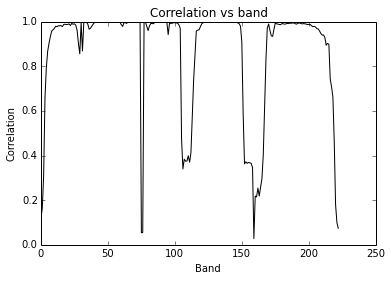

In [9]:
plt.figure(1)
plt.plot(range(0,223),corr, 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()
#Correlation ended

In [10]:
def msort4(x):
    result = []
    if len(x) < 20:
        return sorted(x)
    mid = int(len(x)/2)
    y = msort4(x[:mid])
    z = msort4(x[mid:])
    i = 0
    j = 0
    while i < len(y) and j < len(z):
            if y[i] > z[j]:
                result.append(z[j])
                j += 1
            else:
                result.append(y[i])
                i += 1
    result += y[i:]
    result += z[j:]
    return result

In [11]:
res123 = msort4(corr)

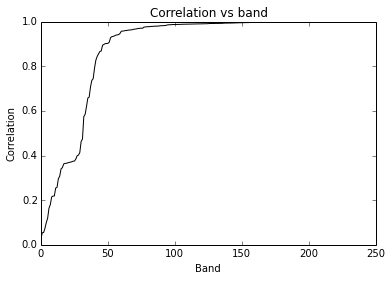

In [12]:
plt.figure(12)
plt.plot(range(0,223),res123, 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [13]:
indexi = []
for i in range(len(corr)):
    ind = corr.index(res123[i])
    indexi.append(ind)
print 'process complete'

process complete


In [14]:
len(indexi)

223

In [15]:
rblock = []
for i in range(len(indexi)):
    rblock.append(block[indexi[i]])
rblock.append(block[223])
print 'process complete'
    

process complete


In [16]:
corrmerge = []
for i in range(223):
    cor1 = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrmerge.append(cor1)
print corrmerge

[0.03088725368080791, 0.053827638542003037, 0.036710368974462934, 0.099795508481439685, 0.012207449941594662, 0.11942699474272997, -0.00092780465552116671, 0.14846488211139441, 0.21842862236574384, 0.18887757254056933, 0.25433021620003732, 0.22971703637555985, 0.2571989119030122, 0.066240779251266868, 0.024381172714918263, 0.28373694720239295, 0.28333060551954725, 0.30425546030804246, 0.35142240538143343, 0.36295109440322454, 0.36915449124001842, 0.33412017144197115, 0.36375621469168729, 0.38185791825011534, 0.37443017150333963, 0.38030590232523098, 0.4032838018940475, -0.028577558041549118, 0.084197532072328038, 0.14676523675410444, 0.59695064255320041, 0.4851043123757055, 0.57162906320948526, 0.52150137019881138, 0.33541455035637213, 0.4093671397467617, 0.70727052002115287, 0.48194421251578162, 0.57214715948936079, 0.59612368311791186, 0.58405371840874376, 0.64708834109951485, 0.42960963346363457, 0.72568332496164545, 0.88503950712924095, 0.8041953792528681, 0.91697759659972955, 0.81

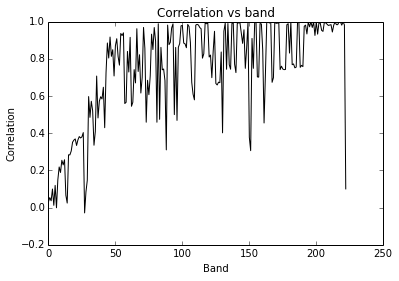

In [17]:
plt.figure(14)
plt.plot(range(0,223),corrmerge, 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [18]:
from sklearn.preprocessing import normalize

In [19]:
rblockn = []
for q in range(len(rblock)):
    xc = rblock[q]
    xv = normalize(xc)
    rblockn.append(xv)
print('Process Complete')

Process Complete


In [20]:
def zigzag(arr):
    a = arr
    x = [a[0][0],a[0][1],a[1][0],a[2][0],a[1][1],a[0][2],a[0][3],a[1][2],a[2][1],a[3][0],a[4][0],a[3][1],a[2][2],a[1][3],a[0][4],a[1][4],a[2][3],a[3][2],a[4][1],a[4][2],a[3][3],a[2][4],a[3][4],a[4][3],a[4][4]]
    return x

In [21]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:5,:5]
    yy = zigzag(xx)
    finlist = finlist + yy

In [22]:
len(finlist)

5600

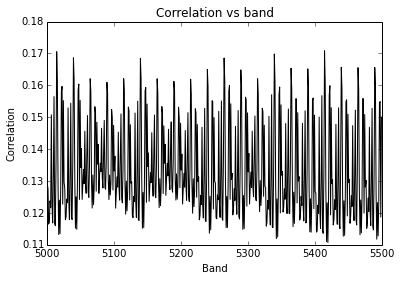

In [41]:
plt.figure(15)
plt.plot(range(5000,5500),finlist[5000:5500], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [24]:
from audiolazy import lpc

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


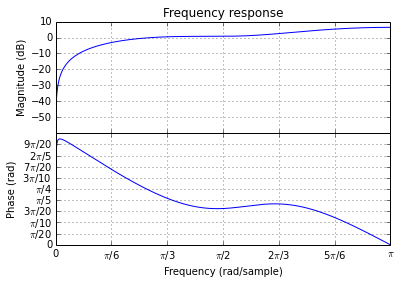

In [25]:
lpc(finlist, order=3).plot().show()

In [26]:
lpcjai = lpc(finlist, order=3)

In [27]:
lpcjai

1 - 0.789077 * z^-1 + 0.0468476 * z^-2 - 0.255361 * z^-3

In [28]:
lpcjai.error

0.87108985060048383

In [29]:
lpcjai.numerator

[1, -0.7890767484371523, 0.04684758431442548, -0.25536138228266964]

In [30]:
reslpc = lpcjai(finlist)

In [31]:
reslpc1 = list(reslpc)

In [32]:
len(reslpc1)

5600

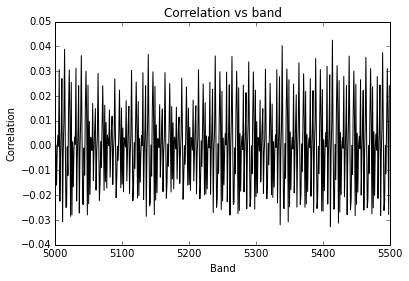

In [42]:
plt.figure(19)
plt.plot(range(5000,5500),reslpc1[5000:5500], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [34]:
errorframe = []
for ijk in range(5600):
    err = reslpc1[ijk] - finlist[ijk]
    errorframe.append(err)
print 'process complete'

process complete


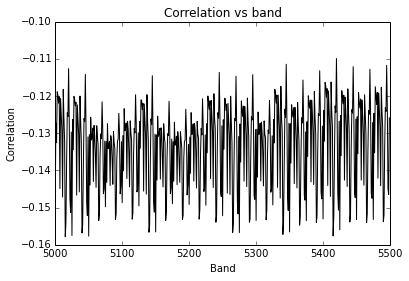

In [43]:
plt.figure(29)
plt.plot(range(5000,5500),errorframe[5000:5500], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [36]:
import heapq
from collections import defaultdict

In [37]:
def encode(frequency):
    heap = [[weight, [symbol, '']] for symbol, weight in frequency.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

In [38]:
frequency = defaultdict(int)
for symbol in errorframe:
    frequency[symbol] += 1

huff = encode(frequency)
#print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
huffcode = []
for p in huff:
    #print  p[0] , str(frequency[p[0]]).ljust(10) , p[1]
    huffcode.append(p[1])
print "process complete"

process complete


In [39]:
len(huffcode)

5586